# P4C1 Améliorez le modèle

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P4C1_overfit_regularisation.ipynb)

Dans ce notebook nous allons travailler sur les problèmes de biais (sous apprentissage) et d'overfit (sur-apprentissage) des modèles. 

Nous travaillons sur le dataset des arbres de Paris

Vous trouverez les versions suivantes du datasets

- sur le site [opendata de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information)
- version [brute](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-2023-09-07.csv) extraite le 10-09-2023, le séparateur est ';'
- version [exploitable](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-clean-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','
- version [numérisée](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','


Ici nous travaillons sur cette version _numérisée_

Toutefois, en avant propos, voici le code pour passer de la version _exploitable_ à la version _numérisée_

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from category_encoders.ordinal import OrdinalEncoder

In [8]:
# chargeons le dataset exploitable
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
data = pd.read_csv(dataset_url)


/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_31462/1347578749.py:3: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_url)


In [9]:
# On ne garde que les arbres non remarquables
data = data[data.remarquable != 'OUI'].copy()

# et ceux avec un stade de développement connu
data.dropna(subset = ['stade_de_developpement'], inplace = True)
# et une hauteur / circonference > 0
data = data[(data.circonference_cm > 0) & (data.hauteur_m > 0)].copy()

# voici les colonnes que l'on va garder, on suprime les autres
columns = ['domanialite', 'arrondissement','libelle_francais', 'genre', 'espece','circonference_cm', 'hauteur_m', 'stade_de_developpement']

data = data[columns]

# encodage ordinal du stade de developpement qui respecte l'ordre des stades
target = 'stade_de_developpement'

mapping =[ {'col': 'stade_de_developpement',
    'mapping': {
                'Jeune (arbre)': 1,
                'Jeune (arbre)Adulte': 2,
                'Adulte': 3,
                'Mature': 4
                }
            } ]

target_encoder = OrdinalEncoder(mapping = mapping)

y = target_encoder.fit_transform(data[target]).stade_de_developpement

# encodage ordinal des variables categoriques
categorical = ['domanialite', 'arrondissement', 'libelle_francais', 'genre', 'espece']
encoder = OrdinalEncoder(cols = categorical)
numeric = encoder.fit_transform(data[categorical])

data = pd.concat([numeric[categorical], data[['circonference_cm', 'hauteur_m']], y  ], axis = 1)

data = data.sample(frac = 1, random_state = 808)
data.reset_index(inplace = True, drop = True)

In [10]:
# On a 
data.shape

(159388, 8)

In [11]:
data.head()

,domanialite,arrondissement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_de_developpement
0,1,8,30,18,36,65.0,8.0,2
1,1,8,2,2,2,25.0,5.0,1
2,3,7,10,10,12,140.0,10.0,3
3,3,7,5,5,14,105.0,10.0,3
4,3,16,4,4,18,263.0,25.0,4


In [12]:
data.describe()

,domanialite,arrondissement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_de_developpement
count,159388.000000,159388.000000,159388.000000,159388.000000,159388.000000,159388.000000,159388.000000,159388.000000
mean,1.765258,9.267191,14.030623,11.420163,28.133511,94.080878,10.444902,2.350936
std,1.345432,5.888304,22.627699,14.854952,55.548801,59.127507,5.553221,0.879943
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,4.000000,4.000000,4.000000,50.000000,6.000000,2.000000
50%,1.000000,8.000000,5.000000,5.000000,9.000000,84.000000,10.000000,3.000000
75%,2.000000,13.000000,18.000000,17.000000,28.000000,125.000000,15.000000,3.000000
max,9.000000,25.000000,187.000000,159.000000,424.000000,1680.000000,710.000000,4.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159388 entries, 0 to 159387
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   domanialite             159388 non-null  int64  
 1   arrondissement          159388 non-null  int64  
 2   libelle_francais        159388 non-null  int64  
 3   genre                   159388 non-null  int64  
 4   espece                  159388 non-null  int64  
 5   circonference_cm        159388 non-null  float64
 6   hauteur_m               159388 non-null  float64
 7   stade_de_developpement  159388 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 9.7 MB


# Arbre de decision sous performant

Chargeons à nouveau le dataset mais cette fois a partir de la version déjà numérisée. 
Nous allons construire un modele de prediction sur la variable cible stade_de_developpement.

In [34]:
filename = 'https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv'
data = pd.read_csv(filename)


In [35]:
X = data[['domanialite', 'arrondissement', 'libelle_francais', 'genre', 'espece', 'circonference_cm', 'hauteur_m']]
y = data.stade_de_developpement.values

scindons le dataset en train et tes

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=808)

Nous utilisons le modèle DecisionTreeClassifier avec une profondeur contrainte a 3

le modele est donc fortement contraint ce qui va nous permettre d'illustrer sa sous-performance: le modèle est biaisé.


In [37]:
from sklearn.tree import DecisionTreeClassifier 

In [38]:
clf = DecisionTreeClassifier(
	max_depth = 3,
    random_state = 808
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=808)

In [39]:
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
print("train",train_auc)
print("test", test_auc)



train 0.8877114343964885
test 0.8882428014767341


In [40]:
from sklearn.metrics import confusion_matrix
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
print(confusion_matrix(y_test, y_test_hat))


[[ 5570  1402   300     2]
 [ 1060  3847  2750     8]
 [  211  1481 13328   466]
 [    4     7   565   877]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           1       0.81      0.77      0.79      7274
           2       0.57      0.50      0.53      7665
           3       0.79      0.86      0.82     15486
           4       0.65      0.60      0.63      1453

    accuracy                           0.74     31878
   macro avg       0.70      0.68      0.69     31878
weighted avg       0.73      0.74      0.74     31878



Notez cependant que le score(test) et le score(train) sont presque égaux:

In [42]:

print("score train:",clf.score(X_train, y_train))

print("score test:",clf.score(X_test, y_test))




score train: 0.7409850207826837
score test: 0.741012610577828


# Overfit

Montrons maintenant le cas d'un modele qui sur apprend le dataset d'entraînement. Pour cela nous enlevons la contrainte sur la profondeur maximum de l'arbre de décision. 


In [43]:
clf = DecisionTreeClassifier(
    max_depth = None,
    random_state = 808
)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=808)

In [44]:
print("score train:",clf.score(X_train, y_train))

print("score test:",clf.score(X_test, y_test))


score train: 0.9354560426633205
score test: 0.8060104147060668


On constate bien un grand écart entre le score sur la partie train et le score sur la partie test.

A quelle moment, pour quelle valeur de _max_depth_ a t on un maximum pour le score(test) ?


In [57]:
scores = []
for depth in np.arange(2, 30, 1):
	clf = DecisionTreeClassifier(
 		 max_depth = depth,
 		 random_state = 808
	)

	clf.fit(X_train, y_train)

	train_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
	test_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
	scores.append({
 		 'max_depth': depth,
 		 'train': train_auc,
 		 'test': test_auc,
	})

scores = pd.DataFrame(scores)
scores


,max_depth,train,test
0,2,0.847089,0.848144
1,3,0.887711,0.888243
2,4,0.902745,0.902875
3,5,0.914770,0.914735
4,6,0.922584,0.922040
5,7,0.929249,0.927862
6,8,0.935176,0.932428
7,9,0.940739,0.934953
8,10,0.946116,0.936590
9,11,0.952259,0.937008


ce qui donne la figure suivante

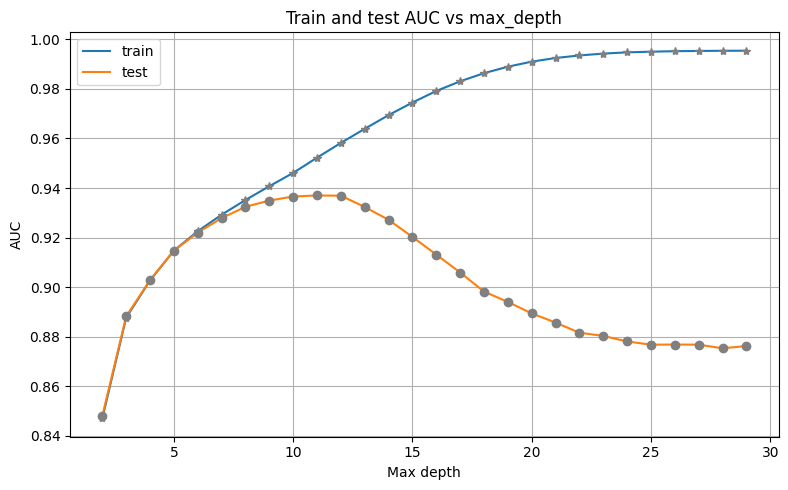

In [58]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(scores.max_depth, scores.train, label = 'train')
plt.plot(scores.max_depth, scores.test, label = 'test')
plt.plot(scores.max_depth, scores.train, '*', color = 'gray')
plt.plot(scores.max_depth, scores.test, 'o', color = 'gray')
ax.grid(True, which = 'both')
ax.set_title('Train and test AUC vs max_depth')
ax.set_xlabel('Max depth')
ax.set_ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()


On observe bien les 3 cas de comportement du modèle
- A gauche, le modèle sous-performe. (biais)
- A droite, il overfit
- Au milieu on obtient la meilleure performance sur le test set.
